In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
mnist.train.images.shape

(55000, 784)

In [17]:
mnist.train.images[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [18]:
single_image = mnist.train.images[1].reshape(28,28)

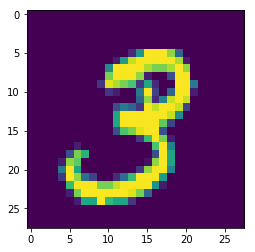

In [19]:
plt.imshow(single_image)

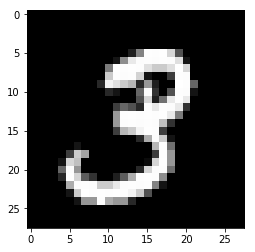

In [20]:
plt.imshow(single_image, cmap="gist_gray")

In [21]:
single_image.min()

0.0

In [22]:
single_image.max()

1.0

In [35]:
# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [33]:
# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [36]:
# Create Graph Operations
y = tf.matmul(x, W) + b

In [37]:
# Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [38]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [39]:
# Create Session
init = tf.global_variables_initializer()

In [41]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
        
    # Evaluate
    correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_true, axis=1))
    # [True, False, False ...] --> [1, 0, 0 ...] - tf.cast
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(acc, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9192
